Accuracy: 0.7512437810945274
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        93
           1       0.63      0.66      0.64        90
           2       0.65      0.61      0.63        90
           3       0.60      0.50      0.55        42
           4       0.79      0.78      0.78       202
           5       0.58      0.59      0.59        64
           6       0.52      0.39      0.44        80
           7       0.69      0.68      0.68        81
           8       0.83      0.86      0.84       418
           9       0.63      0.69      0.66       108
          10       0.76      0.79      0.77       198
          11       0.77      0.76      0.76       164
          12       0.80      0.79      0.80       273
          13       0.79      0.81      0.80       107

    accuracy                           0.75      2010
   macro avg       0.70      0.69      0.70      2010
weighted avg       0.75     

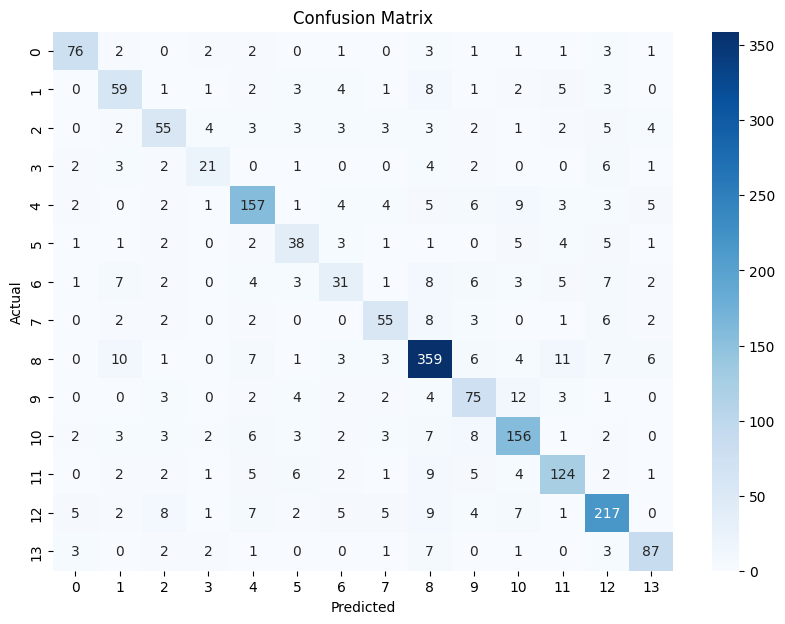

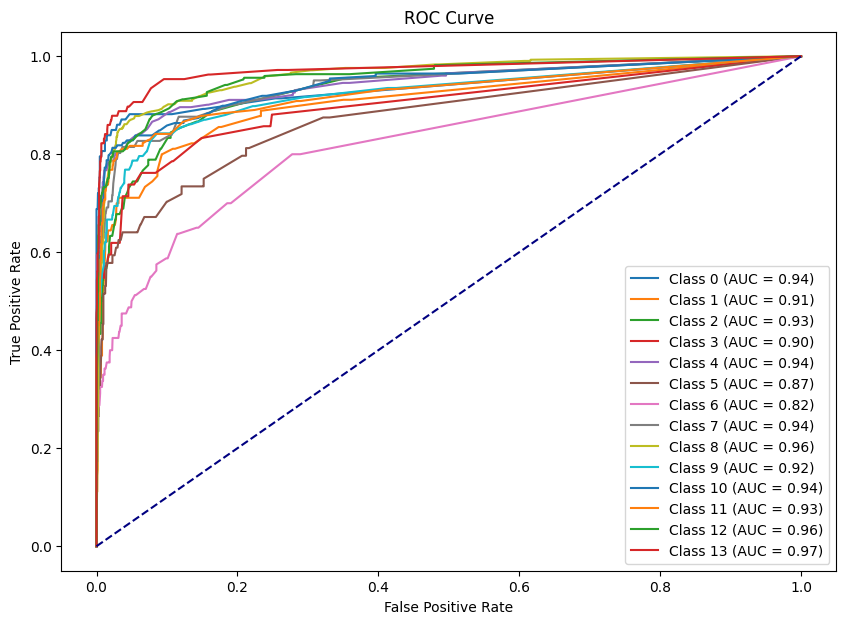

In [5]:
#Simple random forest on preprocessed_random
'''
    Here I have applied random_forest on the Preprocessed_random.csv (random_senario_bi_flow_features.csv)
    I have not used action while training the model, because action may not be present everytime.
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Processed_random.csv')

if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

#Removing actions
data=data.drop('action',axis=1)

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

# print(X.head()) 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)  # Use this for ROC curve

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:
'''
    Since the dataset is imbalance i.e. classes 8, 12, 4, 10 have more than thousand instances while classes 7, 5, 6, 3 has about 350 instances.
    So the dataset is blanaced using 3 techniques
    1. SMOTE - Synthetic Minority Oversampling Technique ; stored in balanced_random_smote.csv
    2. ENN - Edited Nearest Neighbors (Majority Undersampling techinque) ; stored in balanced_random_enn.csv
    3. SMOTE ENN - both undersampling and oversampling techinque ; stored in balanced_random_smoteenn.csv

    All the process is in the file "Resamapling".

    Applying Random forest on balanced dataset and along with their respective hypertuning is in the file "Working_on_random" 
'''

'\n    Since the dataset is imbalance i.e. classes 8, 12, 4, 10 have more than thousand instances while classes 7, 5, 6, 3 has about 350 instances.\n    So the dataset is blanaced using 3 techniques\n    1. SMOTE - Synthetic Minority Oversampling Technique ; stored in balanced_random_smote.csv\n    2. ENN - Edited Nearest Neighbors (Majority Undersampling techinque) ; stored in balanced_random_enn.csv\n    3. SMOTE ENN - both undersampling and oversampling techinque ; stored in balanced_random_smoteenn.csv\n\n    All the process is in the file "Resamapling".\n\n    Applying Random forest on balanced dataset and along with their respective hypertuning is in the file "Working_on_random" \n'

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['ul_input', 'dl_input', 'temporal_input', 'protocol_input']. Received: the structure of inputs=('*', '*', '*', '*')
  warnings.warn(


706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Model Performance Metrics:
Accuracy: 0.9640
Precision: 0.9640
Recall: 0.9640
F1 Score: 0.9640

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1731
           1       0.95      0.96      0.95      1443
           2       0.95      0.96      0.96      1550
           3       0.97      0.98      0.97      1625
           4       0.97      0.96      0.96      1551
           5       0.96      0.97      0.96      1534
           6       0.95      0.97      0.96      1584
           7       0.97      0.98      0.97      1624
           8       0.97      0.95      0.96      1479
           9       0.96      0.96      0.96      1702
          10       0.96      0.95      0.95      1547
          11       0.97      0.97      0.97      1719
          12       0.97      0.95      0.96      1654
          13       0.97      0.96      0.96      1818

    accuracy       

<Figure size 1200x500 with 0 Axes>

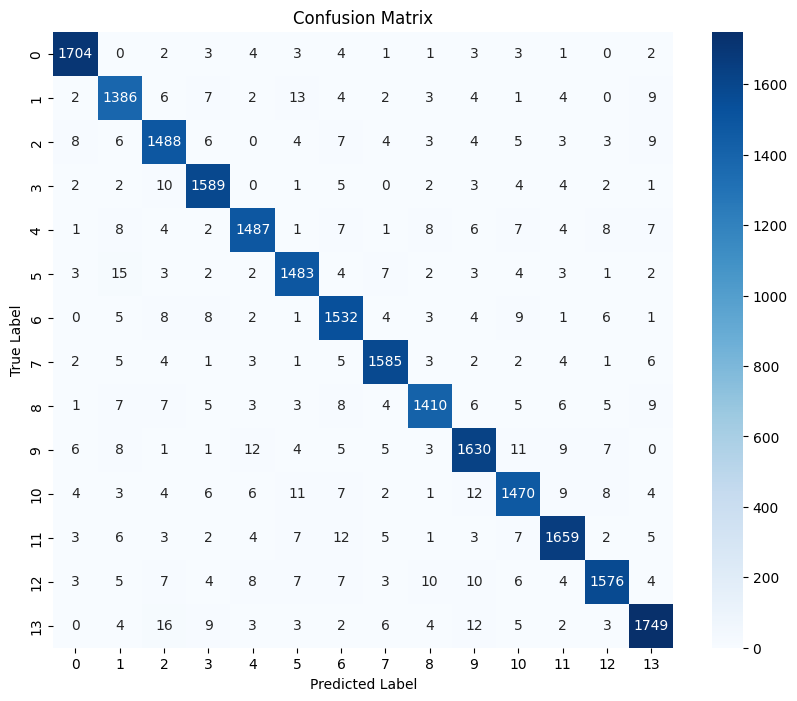

In [12]:
'''
    Applied multimodal Autoencoder 
    its in the file Multimodal
    obtained an acuuracy of 81.99%
    but when tested the modal obtained an accuracy of 96.40% accuracy
    a snippet of evalution is as below tested with balanced_random_smoteenn.csv
'''

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report,
    ConfusionMatrixDisplay
)

def evaluate_model(test_data_path, autoencoder_path, rf_path, scalers_path, protocol_encoder_path):
    # Load models and scalers
    autoencoder = tf.keras.models.load_model(autoencoder_path)
    rf_classifier = joblib.load(rf_path)
    scalers = joblib.load(scalers_path)
    protocol_encoder = joblib.load(protocol_encoder_path)
    
    # Load and preprocess test data
    test_data = pd.read_csv(test_data_path)
    test_labels = test_data['app']
    
    # Preprocess features using loaded scalers
    scaled_features = {}

    # Protocol encoding
    protocol_encoded = protocol_encoder.transform(test_data[['protocal']])
    protocol_df = pd.DataFrame(protocol_encoded, 
                             columns=[f'protocol_{i}' for i in range(protocol_encoded.shape[1])])
    
    # Process IP addresses
    test_data['ip_A'] = test_data['ip_A'].astype(str).apply(lambda x: int(x.split('.')[-1]))
    test_data['ip_B'] = test_data['ip_B'].astype(str).apply(lambda x: int(x.split('.')[-1]))
    
    # Feature engineering
    test_data['ul_byte_pkt_ratio'] = test_data['ul_total_num_bytes'] / (test_data['ul_total_num_pkts'] + 1e-6)
    test_data['dl_byte_pkt_ratio'] = test_data['dl_total_num_bytes'] / (test_data['dl_total_num_pkts'] + 1e-6)
    test_data['total_duration'] = test_data['ul_dur'] + test_data['dl_dur']
    
    # Log transform temporal features
    temporal_features = ['ul_min_iat', 'ul_max_iat', 'ul_mean_iat', 'ul_std_iat', 'ul_dur',
                        'dl_min_iat', 'dl_max_iat', 'dl_mean_iat', 'dl_std_iat', 'dl_dur']
    for col in temporal_features:
        test_data[col] = np.log1p(test_data[col])
    
    # Define feature sets
    feature_sets = {
        'ul_flow': ['ul_total_num_pkts', 'ul_total_num_bytes', 'ul_min_pkt_size', 
                    'ul_max_pkt_size', 'ul_mean_pkt_size', 'ul_std_pkt_size', 'ul_byte_pkt_ratio'],
        'dl_flow': ['dl_total_num_pkts', 'dl_total_num_bytes', 'dl_min_pkt_size', 
                    'dl_max_pkt_size', 'dl_mean_pkt_size', 'dl_std_pkt_size', 'dl_byte_pkt_ratio'],
        'temporal': temporal_features + ['total_duration'],
        'protocol': ['ip_A', 'ip_B', 'port_A', 'port_B']
    }
    
    # Scale features using loaded scalers
    for name, feature_list in feature_sets.items():
        if name == 'protocol':
            features = pd.concat([test_data[feature_list], protocol_df], axis=1)
        else:
            features = test_data[feature_list]
        scaled_features[name] = scalers[name].transform(features)
    
    # Get latent representation
    encoder = Model(inputs=autoencoder.inputs,
                   outputs=autoencoder.get_layer('latent_space').output)
    latent_features = encoder.predict(list(scaled_features.values()))
    
    # Make predictions
    predictions = rf_classifier.predict(latent_features)
    
    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(test_labels, predictions),
        'Precision': precision_score(test_labels, predictions, average='weighted'),
        'Recall': recall_score(test_labels, predictions, average='weighted'),
        'F1 Score': f1_score(test_labels, predictions, average='weighted')
    }
    
    # Generate plots
    plt.figure(figsize=(12, 5))
    
    # Confusion Matrix
    cm = confusion_matrix(test_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(test_labels, predictions), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Print classification report
    report = classification_report(test_labels, predictions)
    
    return metrics, report, cm

# Usage example:
if __name__ == "__main__":
    metrics, report, cm = evaluate_model(
        'balanced_random_smoteenn.csv',
        'enhanced_autoencoder.h5',
        'rf_classifier.pkl',
        'scalers.pkl',
        'protocol_encoder.pkl'
    )
    
    # Print results
    print("\nModel Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    print("\nDetailed Classification Report:")
    print(report)
    
    plt.show()